# 在Minist数据集上进行PCA分析
图像数据维数高，而且特征之间（像素之间）相关性很高，因此我们预计用很少的维数就能保留足够多的信息

In [1]:
#导入必要的工具包
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import time

In [2]:
#读取训练数据和测试数据
train = pd.read_csv('./data/MNIST_train.csv')
test = pd.read_csv('./data/MNIST_test.csv')

y_train = train.label.values
X_train = train.drop("label",axis=1).values
X_test = test.values 

In [3]:
#将像素值[0,255]  --> [0,1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
# 原始输入的特征维数和样本数目
print('the shape of train_image: {}'.format(X_train.shape))
print('the shape of test_image: {}'.format(X_test.shape))

the shape of train_image: (42000, 784)
the shape of test_image: (28000, 784)


In [5]:
# 将训练集合拆分成训练集和校验集，在校验集上找到最佳的模型超参数（PCA的维数）
X_train_part, X_val, y_train_part, y_val = train_test_split(X_train,y_train, train_size = 0.8,random_state = 0)

/Users/qing/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [6]:
#拆分后的训练集和校验集的样本数目
print(X_train_part.shape)
print(X_val.shape)

(33600, 784)
(8400, 784)


In [7]:
# 一个参数点（PCA维数为n）的模型训练和测试，得到该参数下模型在校验集上的预测性能
def n_component_analysis(n, X_train, y_train, X_val, y_val):
    start = time.time()
    
    pca = PCA(n_components=n)
    print("PCA begin with n_components: {}".format(n));
    pca.fit(X_train)
    
    # 在训练集和测试集降维 
    X_train_pca = pca.transform(X_train)
    X_val_pca = pca.transform(X_val)
    
    # 利用SVC训练
    print('SVC begin')
    clf1 = svm.SVC()
    clf1.fit(X_train_pca, y_train)
    
    # 返回accuracy
    accuracy = clf1.score(X_val_pca, y_val)
    
    end = time.time()
    print("accuracy: {}, time elaps:{}".format(accuracy, int(end-start)))
    return accuracy

In [8]:
# 设置超参数（PCA维数）搜索范围
n_s = np.linspace(0.70, 0.85, num=15)
accuracy = []
for n in n_s:
    tmp = n_component_analysis(n, X_train_part, y_train_part, X_val, y_val)
    accuracy.append(tmp)

PCA begin with n_components: 0.7
SVC begin
accuracy: 0.97869047619, time elaps:14
PCA begin with n_components: 0.710714285714
SVC begin
accuracy: 0.979166666667, time elaps:14
PCA begin with n_components: 0.721428571429
SVC begin
accuracy: 0.979404761905, time elaps:14
PCA begin with n_components: 0.732142857143
SVC begin
accuracy: 0.979404761905, time elaps:15
PCA begin with n_components: 0.742857142857
SVC begin
accuracy: 0.980119047619, time elaps:15
PCA begin with n_components: 0.753571428571
SVC begin
accuracy: 0.979761904762, time elaps:15
PCA begin with n_components: 0.764285714286
SVC begin
accuracy: 0.979880952381, time elaps:16
PCA begin with n_components: 0.775
SVC begin
accuracy: 0.979166666667, time elaps:16
PCA begin with n_components: 0.785714285714
SVC begin
accuracy: 0.97880952381, time elaps:18
PCA begin with n_components: 0.796428571429
SVC begin
accuracy: 0.979047619048, time elaps:18
PCA begin with n_components: 0.807142857143
SVC begin
accuracy: 0.979166666667, ti

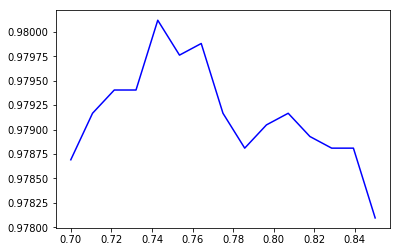

In [9]:
# 绘制不同PCA维数下模型的性能，找到最佳模型／参数（分数最高）
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(n_s, np.array(accuracy), 'b-')

In [10]:
#最佳模型参数
pca = PCA(n_components=0.75)

#根据最佳参数，在全体训练数据上重新训练模型
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.75, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
pca.n_components_

33

In [12]:
pca.explained_variance_ratio_

array([ 0.09748938,  0.07160266,  0.06145903,  0.05379302,  0.04894262,
        0.04303214,  0.03277051,  0.02892103,  0.02766902,  0.02348871,
        0.02099325,  0.02059001,  0.01702553,  0.01692787,  0.01581126,
        0.0148324 ,  0.01319688,  0.01282727,  0.01187976,  0.01152755,
        0.01072191,  0.01015199,  0.00964902,  0.00912846,  0.00887641,
        0.00838766,  0.00811856,  0.00777406,  0.00740635,  0.00686661,
        0.00657982,  0.00638799,  0.00599367])

In [13]:
#根据最佳参数，对全体训练数据降维
X_train_pca = pca.transform(X_train)

#根据最佳参数，对测试数据降维
X_test_pca = pca.transform(X_test)

In [14]:
# 降维后的特征维数
print(X_train_pca.shape)
print(X_test_pca.shape)

(42000, 33)
(28000, 33)


In [15]:
#在降维后的训练数据集上训练SVM分类器
clf = svm.SVC()
clf.fit(X_train_pca, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
# 用在降维后的全体训练数据集上训练的模型对测试集进行测试
y_predict = clf.predict(X_test_pca)

In [17]:
#生成提交测试结果
import pandas as pd
df = pd.DataFrame(y_predict)
df.columns=['Label']
df.index+=1
df.index.name = 'Imageid'
df.to_csv('SVC_Minist_submission.csv', header=True)